## Capstone Project - Credit Card Fraud Detection

#### Objective:

The objective of this Capstone project is to build a machine learning model capable of detecting fraudulent transactions in Credit Card transactions being conducted in millions across the globe. This will help the banks to take preventive actions in reducing the fraudulent credit card transactions and by doing this they will improve customer satisfaction and customer retention objectives.
As data analyst in this model building process, we need to handle class imbalances present in the given data set, along with model selection and hyperparameter tuning such that the model can identify minority fraudulent transactions in comparison to the high volume legal transactions without impacting the customers and services provided.

#### About the Data:
For this Capstone project the data available in Kaggel @ https://www.kaggle.com/mlg-ulb/creditcardfraud
As per the Kaggle website the data contains transactions made by credit card holders in September 2013 by European customers. 
This dataset presents transactions that occurred in two days, where it was classified that there are 492 fraudulent transactions out of total 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to sensitivity of the data and confidentiality issues, the data provided is not having the original features and more background information. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


## Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal. In terms of substantial financial losses, trust and credibility.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. 
With the rise in digital payment channels, the number of fraudulent transactions is also increasing.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

## Importing Libraries Required

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, make_scorer, confusion_matrix
from time import time



## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

# The information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Observation: There are no missing values. So missing value imputation is not necessary for this data set. Also, all columns are numerical

In [4]:
# Finding the number of transactions which were fraudulent and non-fraudulent
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Observation: There are 2,84,315 non-fraudulent transactions and 492 fraudulent transactions.

In [5]:
# Finding the maximum amount for which a fraudulent transaction occurred
df.Amount[df.Class==1].max()

2125.87

In [6]:
# Finding the maximum amount for which a fraudulent transaction occurred
df.Amount[df.Class==1].min()

0.0

#### Observation: The maximum Amount value for which a fraudulent transaction occurred is 2125.87

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Analysing for maximum and minimum values for all the variables

In [8]:
# Maximum and Minimum values for each the columns in df
max_min=pd.DataFrame(index=['max','min'])
for i in df.columns:
    max_min[i]=[df[i].max(),df[i].min()]
max_min

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
max,172792.0,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,1
min,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.00,0


### Outlier analysis

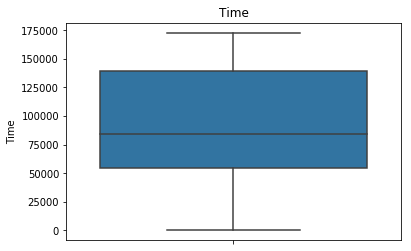

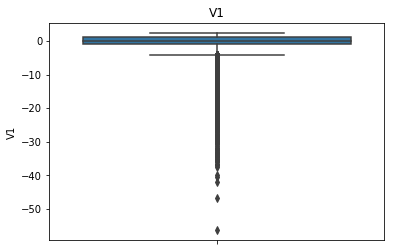

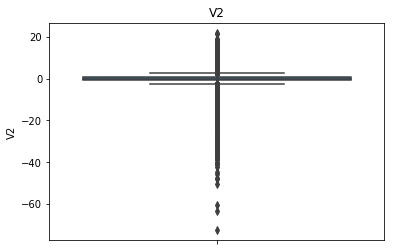

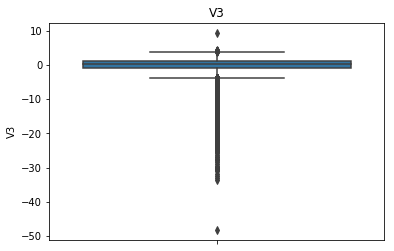

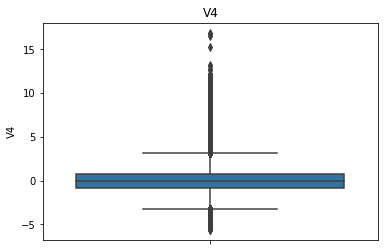

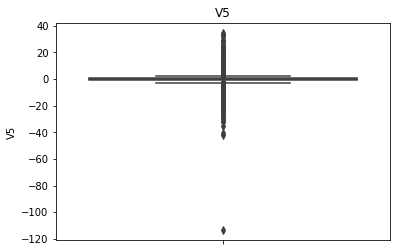

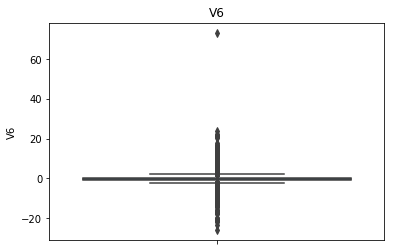

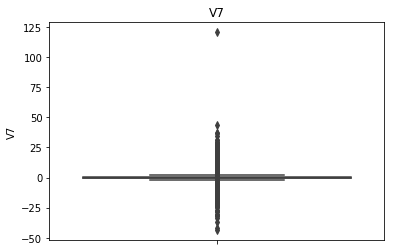

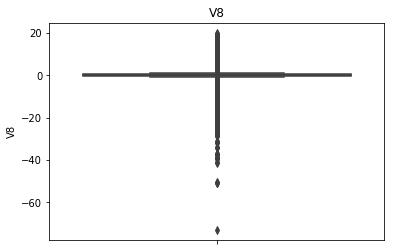

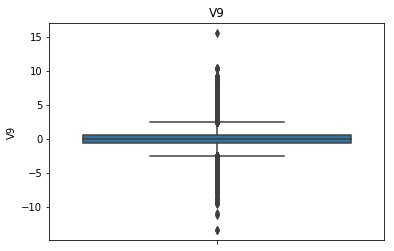

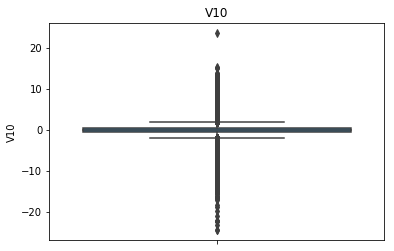

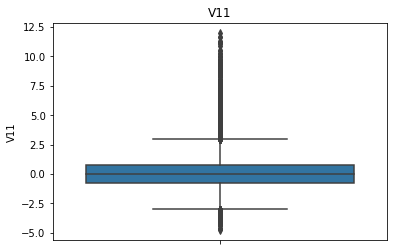

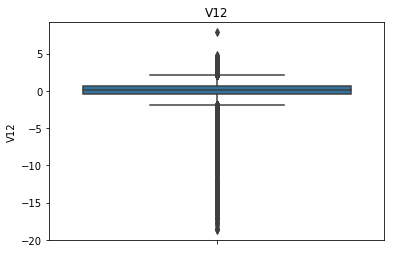

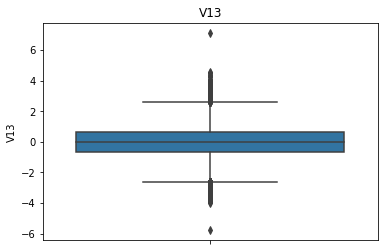

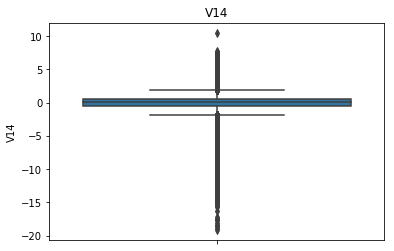

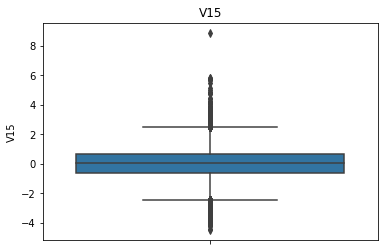

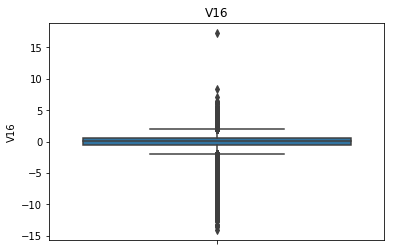

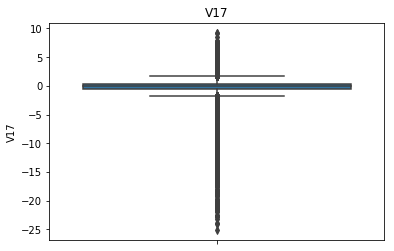

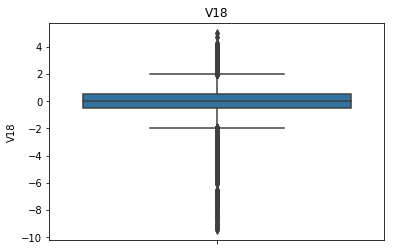

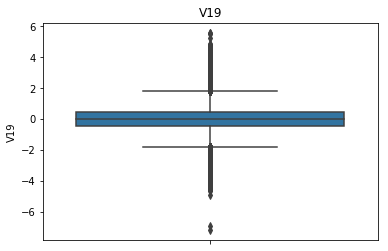

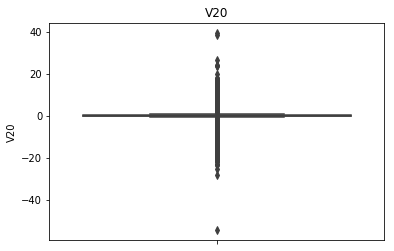

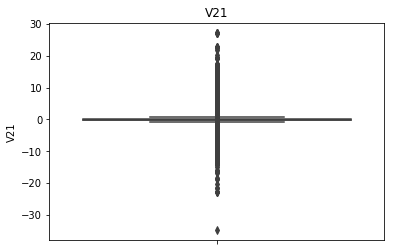

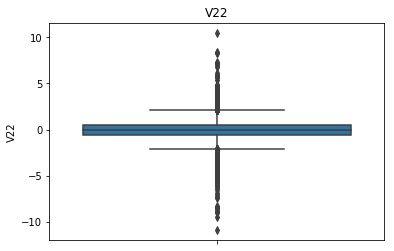

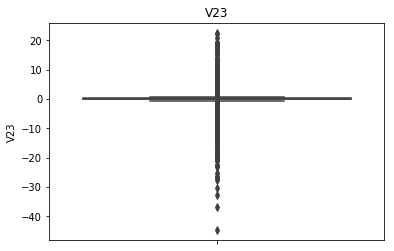

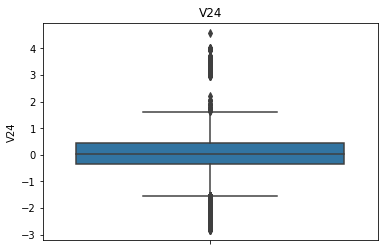

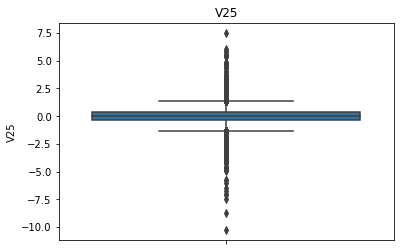

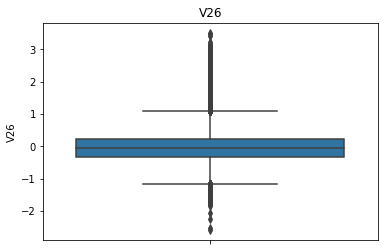

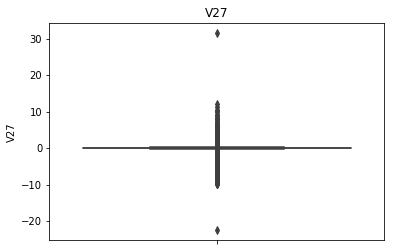

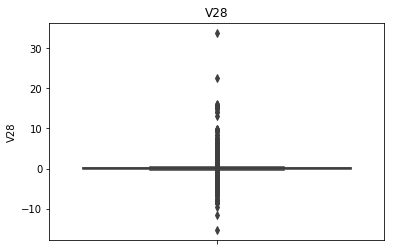

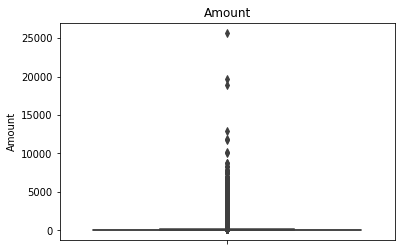

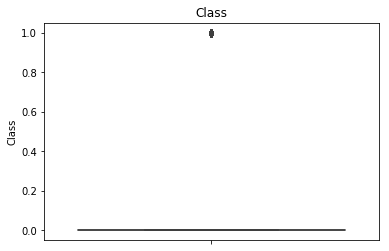

In [9]:
# Checking for outliers
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.ylabel(i)
    plt.show()

#### Observation: Outliers are present in the dataset, for all columns except 'Time', as we have less fraudulent transactions and to avoid data loss not doing any outlier treatment

### Analysing the Amount Vs other variable distribution

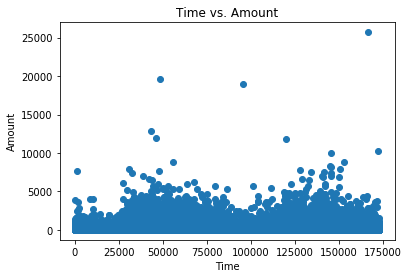

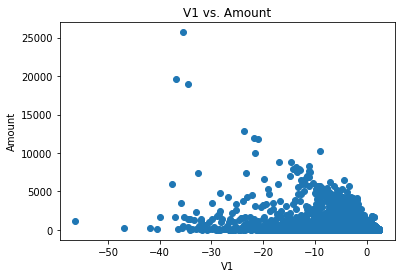

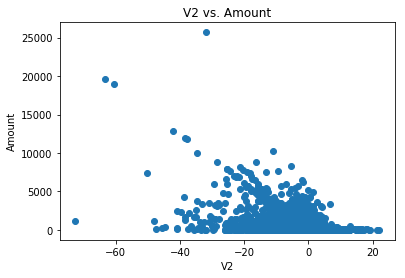

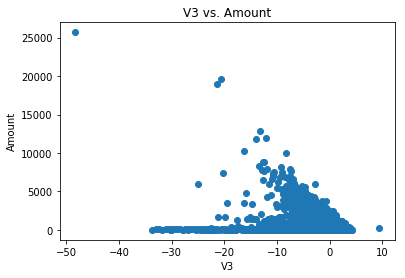

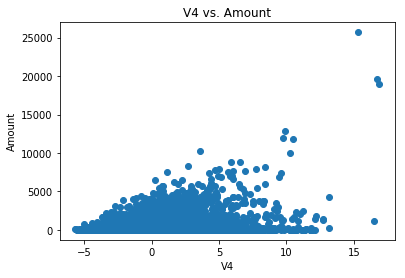

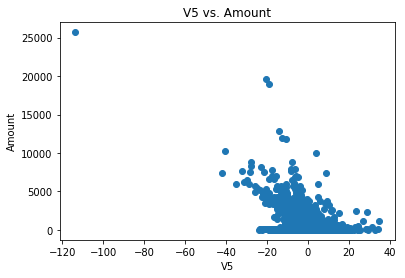

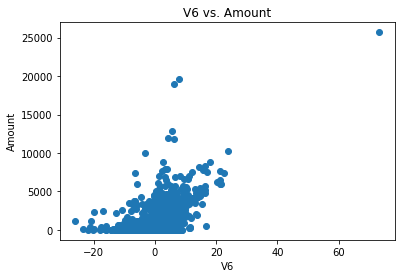

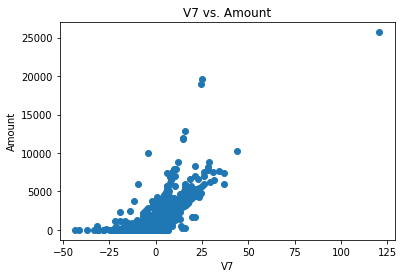

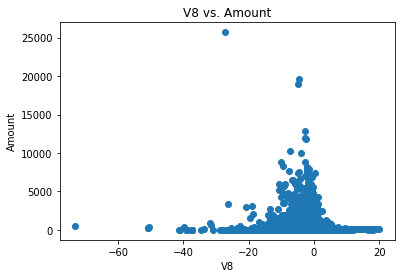

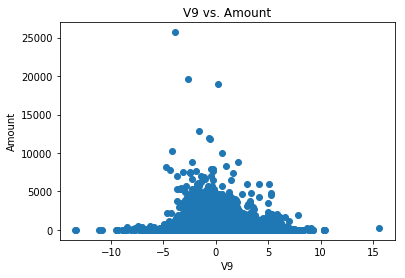

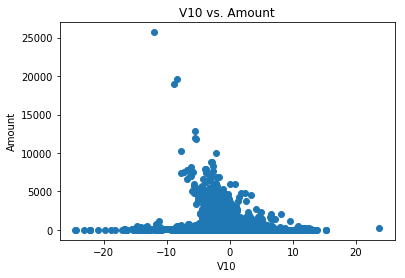

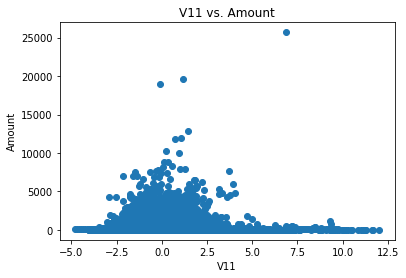

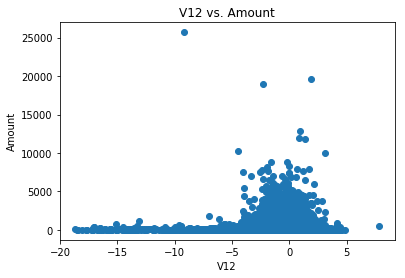

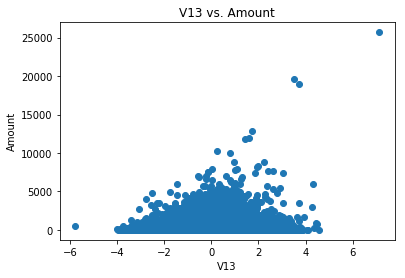

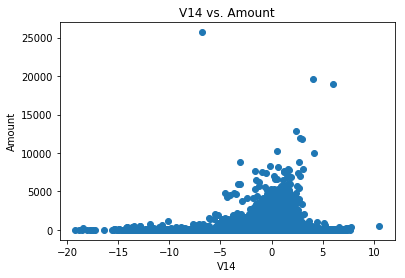

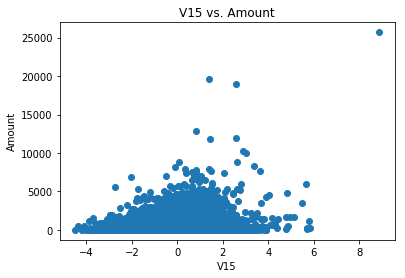

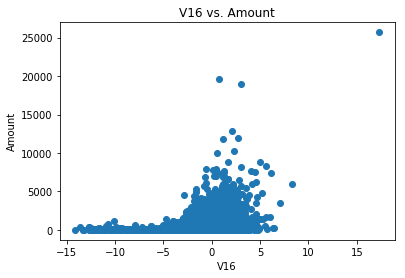

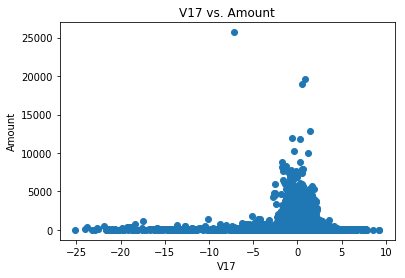

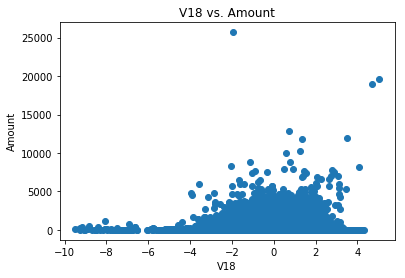

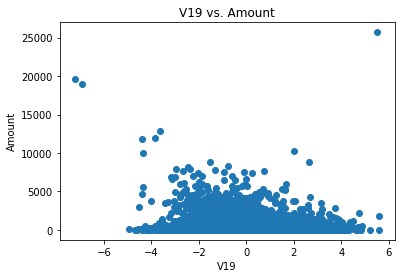

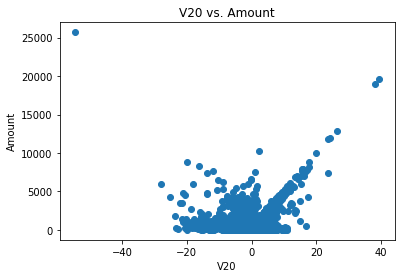

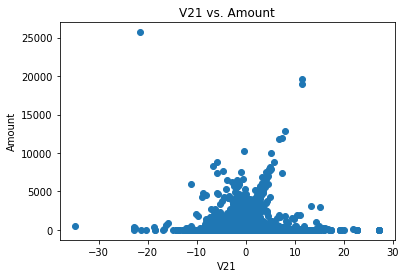

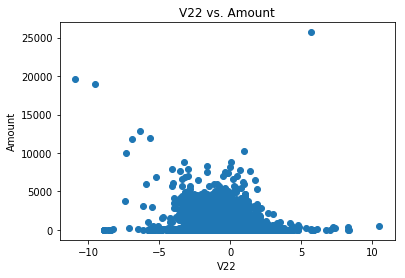

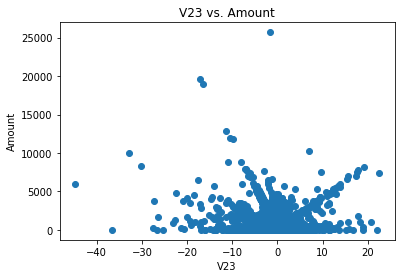

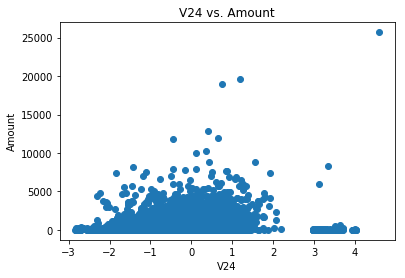

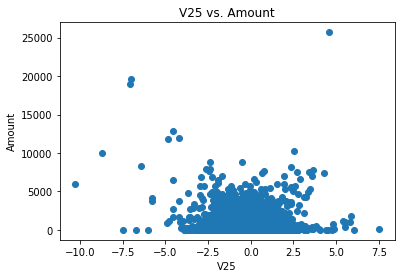

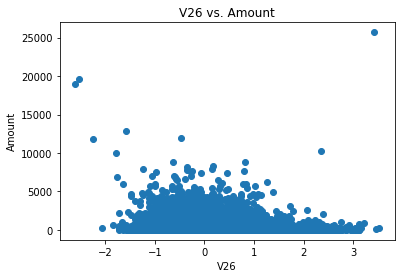

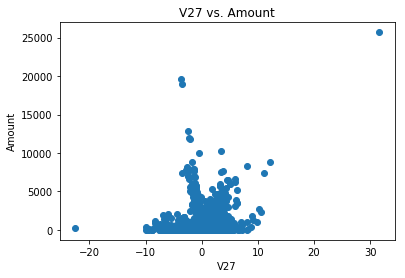

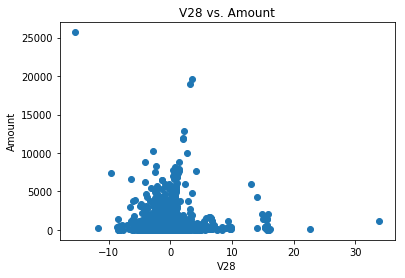

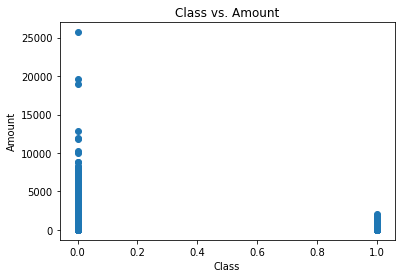

In [10]:
# Checking the relationship between each of the columns and amount
for i in df.columns:
    if i != 'Amount':
        plt.scatter(df[i],df.Amount)
        plt.title(i+' vs. Amount')
        plt.ylabel('Amount')
        plt.xlabel(i)
        plt.show()

#### Here we will observe the distribution of our classes/variables with respect to Amount

### Data class analysis

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Class 0 makes up', normal_share, '% of the dataset')
print('Class 1 makes up',fraud_share,'% of the dataset')

Class 0 makes up 99.82725143693798 % of the dataset
Class 1 makes up 0.1727485630620034 % of the dataset


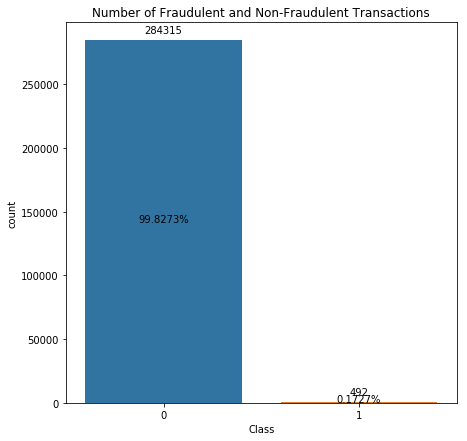

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,7))
plot=sns.countplot(df.Class)
total=len(df)
for i in plot.patches:
    plot.annotate(format(i.get_height()),(i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
    height = i.get_height()
    plot.text(i.get_x()+i.get_width()/2., height/2, '{:1.4f}%'.format(height/total*100),ha="center")
plt.title('Number of Fraudulent and Non-Fraudulent Transactions')
plt.show()



#### Class 1 (Fraudulent transaction) data is at minority @ 0.1727485%

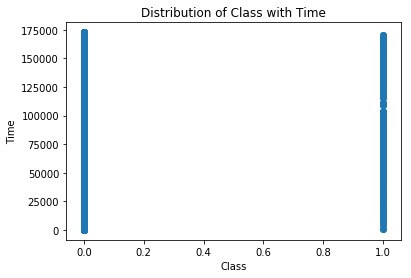

In [13]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df.Class,df.Time)
plt.xlabel('Class')
plt.ylabel('Time')
plt.title('Distribution of Class with Time')
plt.show()

#### Observation: Fraudulent transactions have occurred throughout the time range and not shows any specific trend, hence we can conclude that there is no clear correlation between the time and fraudulent transaction

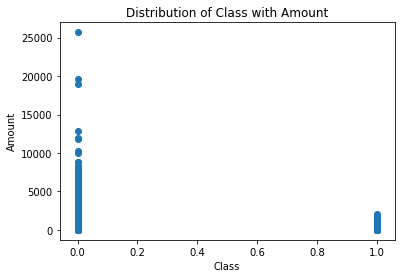

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class,df.Amount)
plt.title('Distribution of Class with Amount')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

#### Observation: All fraudulent transactions have occurred for an amount less than 2125.

### Dropping the time column from the data for further analysis and model building

In [15]:
# Drop unnecessary columns
df.drop('Time',axis=1,inplace=True)

## Model building without balancing classes

In [16]:
y=df.Class
x=df.drop('Class',axis=1)

In [17]:
# Split the dataset into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=50)

In [18]:
# Standardize Amount column
scale = StandardScaler()
X_train['Amount']=scale.fit_transform(pd.DataFrame(X_train['Amount'],columns=['Amount']))
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt=preprocessing.PowerTransformer(copy=False)
x_train_transform=pt.fit_transform(X_train)
x_train_transform=pd.DataFrame(x_train_transform,columns=X_train.columns)

# Transforming the test dataset
x_test_transform=pt.transform(X_test)
x_test_transform=pd.DataFrame(x_test_transform,columns=X_test.columns)

##### Logistic Regression Model with imbalanced dataset using hyperparameter tuning

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=5 .............................................................
[CV] .............................................. C=5, total=   2.8s
[CV] C=5 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .............................................. C=5, total=   2.2s
[CV] C=5 .............................................................
[CV] .............................................. C=5, total=   2.0s
[CV] C=5 .............................................................
[CV] .............................................. C=5, total=   2.1s
[CV] C=5 .............................................................
[CV] .............................................. C=5, total=   2.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   2.4s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   2.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.7s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   41.8s finished


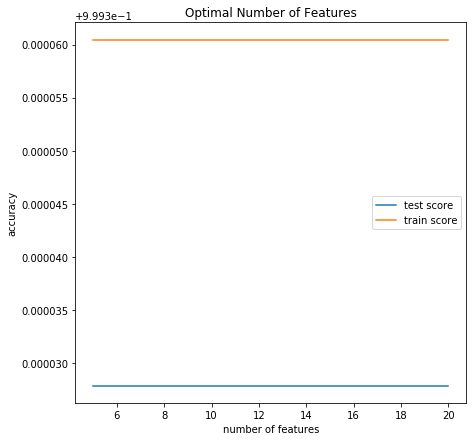

In [20]:
# copying the data set to build a logistic regression model
xtrain_log=x_train_transform
xtest_log=x_test_transform
ytrain_log=y_train
ytest_log=y_test

# Initialise logistic regression
logreg=LogisticRegression(random_state=50)

# Set list of parameters
parameters = { 'C' : list(np.arange(5,25,5))}

#Run the gridsearch model
grid_search = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'accuracy', cv = 5, verbose = 2, return_train_score=True)
grid_scores = grid_search.fit(xtrain_log, ytrain_log)
cv_results_5 = pd.DataFrame(grid_scores.cv_results_)

# Plot test score and train score to understand what is the optimal number of features
plt.figure(figsize=(7,7))
plt.plot(cv_results_5["param_C"], cv_results_5["mean_test_score"])
plt.plot(cv_results_5["param_C"], cv_results_5["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='best')

In [21]:
# Build logistic regression model
logreg = LogisticRegression()
logreg.fit(xtrain_log, ytrain_log)

# predict on X_test
y_pred = logreg.predict(xtest_log)
logreg_cm=confusion_matrix(ytest_log, y_pred)


In [22]:
# Create a dataframe to store performance measures of each model
performance_df=pd.DataFrame(columns=['Model','Accuracy','Precision','Sensitivity','Specificity'])
temp=pd.DataFrame({'Model':'Logistic Regression',
                   'Accuracy':(logreg_cm[0][0] + logreg_cm[1][1]) / len(ytest_log),
                  'Precision':(logreg_cm[1][1] / (logreg_cm[0][1] + logreg_cm[1][1])),
                  'Sensitivity':(logreg_cm[1][1] / (logreg_cm[1][1] + logreg_cm[1][0])),
                  'Specificity':(logreg_cm[1][1] / (logreg_cm[1][1] + logreg_cm[1][0]))},index=[0])
performance_df=pd.concat([performance_df,temp],axis=0)
performance_df

,Model,Accuracy,Precision,Sensitivity,Specificity
0,Logistic Regression,0.999169,0.827586,0.653061,0.653061


##### Decision Tree with imbalanced data using hyperparameter tuning

In [23]:
# Copy the data set to build a decision tree
xtrain_dt=x_train_transform
xtest_dt=x_test_transform
ytrain_dt=y_train
ytest_dt=y_test

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

folds = 5

# Instantiate the grid search model
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(xtrain_dt,ytrain_dt)
cv_results = pd.DataFrame(grid_search.cv_results_)

# printing the optimal accuracy score and hyperparameters
print("Best accuracy =", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  9.5min finished


Best accuracy = 0.9991272250521007
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [24]:
# model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=50)
dt_model.fit(xtrain_dt,ytrain_dt)

y_pred_dt=dt_model.predict(xtest_dt)

dt_cm = metrics.confusion_matrix(ytest_dt, y_pred_dt)

In [25]:
# Add performance metrics to the performance_df dataframe
temp=pd.DataFrame({'Model':'Decision Tree',
                   'Accuracy':(dt_cm[0][0] + dt_cm[1][1]) / len(ytest_dt),
                  'Precision':dt_cm[1][1] / (dt_cm[0][1] + dt_cm[1][1]),
                  'Sensitivity':dt_cm[1][1] / (dt_cm[1][1] + dt_cm[1][0]),
                  'Specificity':dt_cm[1][1] / (dt_cm[1][1] + dt_cm[1][0])},index=[1])
performance_df=pd.concat([performance_df,temp],axis=0)
performance_df

,Model,Accuracy,Precision,Sensitivity,Specificity
0,Logistic Regression,0.999169,0.827586,0.653061,0.653061
1,Decision Tree,0.998958,0.704225,0.680272,0.680272


##### Extreme Gradient Boosting (XGBoost) Model using imbalanced dataset

In [26]:
from xgboost import XGBClassifier

C:\Users\Anupama\anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Anupama\anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\Anupama\anaconda\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


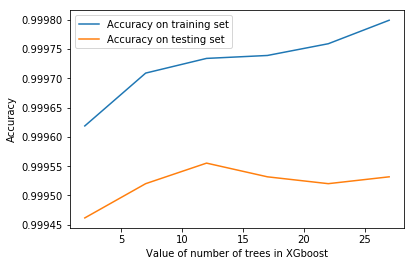

In [27]:
xtrain_xgb=x_train_transform
xtest_xgb=x_test_transform
ytrain_xgb=y_train
ytest_xgb=y_test

tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(xtrain_xgb,ytrain_xgb)
    score1.append(xgb.score(xtrain_xgb,ytrain_xgb))
    score2.append(xgb.score(xtest_xgb,ytest_xgb))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
xgb=XGBClassifier(n_estimators=13)
xgb.fit(xtrain_xgb,ytrain_xgb)
y_pred_xgb=xgb.predict(xtest_xgb)
xgb_cm = metrics.confusion_matrix(ytest_xgb, y_pred_xgb)

In [29]:
# Add performance metrics to the performance_df dataframe
temp=pd.DataFrame({'Model':'XGBoost',
                   'Accuracy':(xgb_cm[0][0] + xgb_cm[1][1]) / len(ytest_xgb),
                  'Precision':xgb_cm[1][1] / (xgb_cm[0][1] + xgb_cm[1][1]),
                  'Sensitivity':xgb_cm[1][1] / (xgb_cm[1][1] + xgb_cm[1][0]),
                  'Specificity':xgb_cm[1][1] / (xgb_cm[1][1] + xgb_cm[1][0])},index=[2])
performance_df=pd.concat([performance_df,temp],axis=0)
performance_df

,Model,Accuracy,Precision,Sensitivity,Specificity
0,Logistic Regression,0.999169,0.827586,0.653061,0.653061
1,Decision Tree,0.998958,0.704225,0.680272,0.680272
2,XGBoost,0.999544,0.935484,0.789116,0.789116


#### Observation: Comparing the performance metrics for all three models, XGBoost model is the best model and Decision Tree is the worst

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Data Balancing with Random Oversampling

In [30]:
y=df.Class
X=df.drop('Class',axis=1)

In [31]:
from imblearn import over_sampling #- import the packages

from imblearn.over_sampling import RandomOverSampler

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ml_train_lr , ml_test_lr = ros.fit_sample(X, y)

In [33]:
from collections import Counter
print(sorted(Counter(ml_test_lr).items()))

[(0, 284315), (1, 284315)]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(ml_train_lr, ml_test_lr, test_size = 0.30, random_state = 0)

#### Standardize Amount column

In [35]:
scale = preprocessing.StandardScaler()
X_train['Amount']=scale.fit_transform(pd.DataFrame(X_train['Amount'],columns=['Amount']))
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


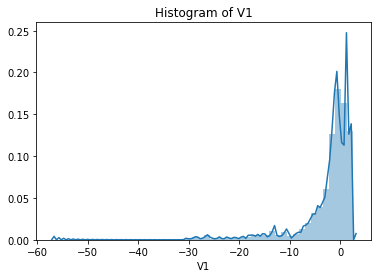

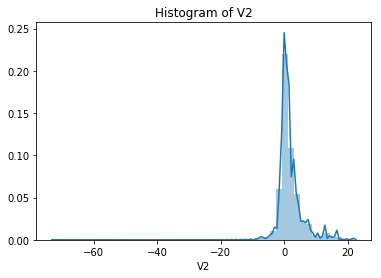

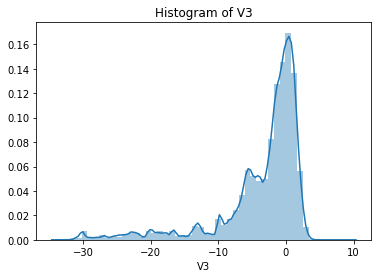

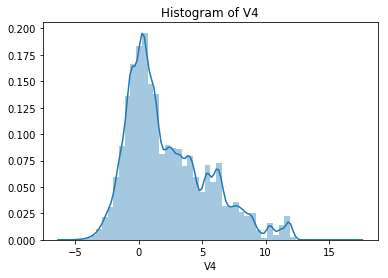

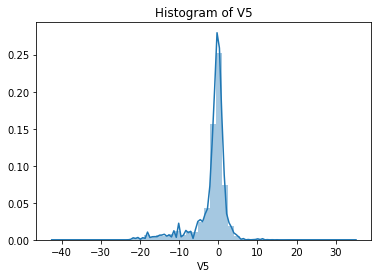

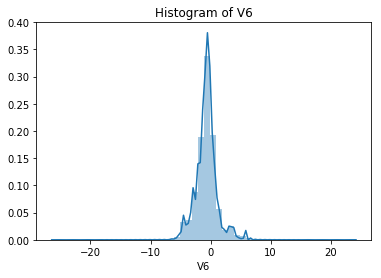

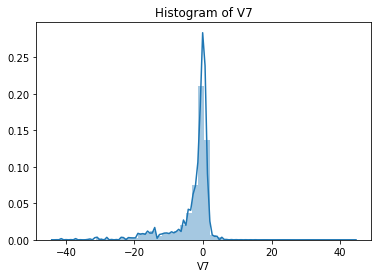

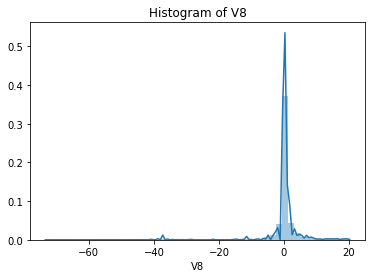

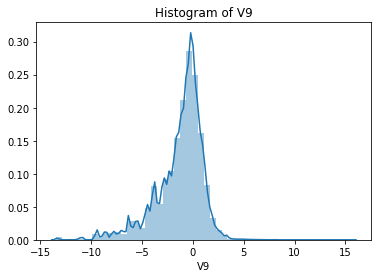

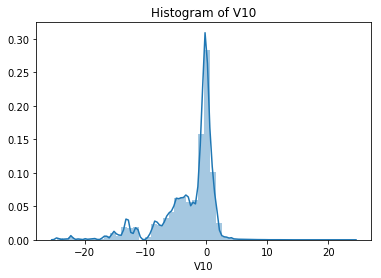

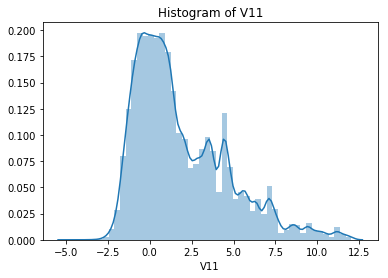

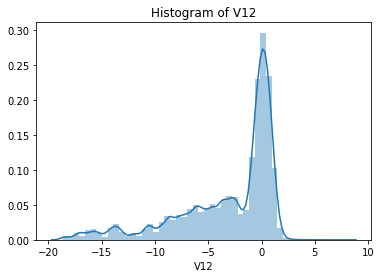

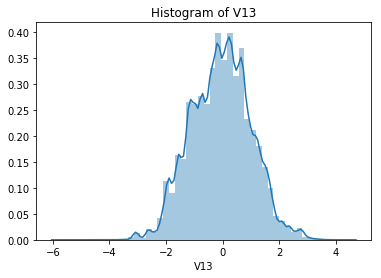

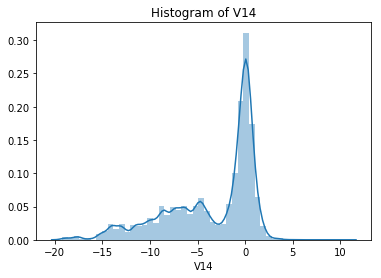

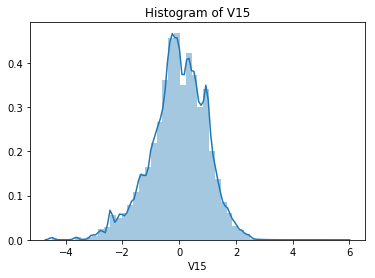

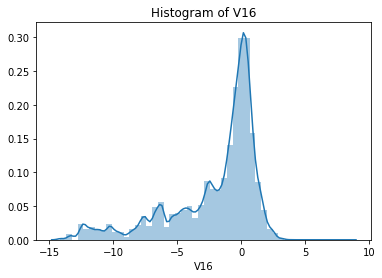

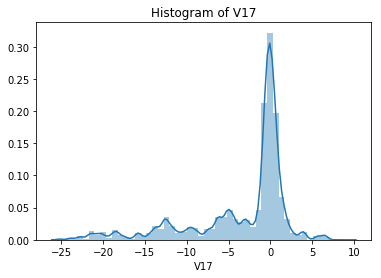

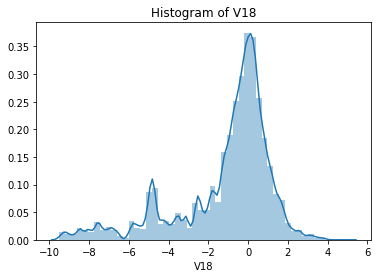

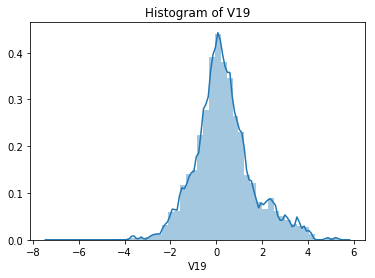

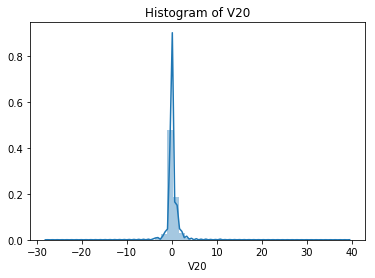

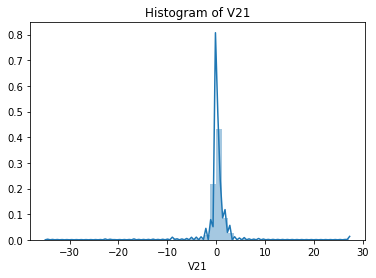

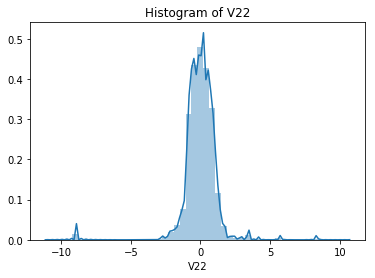

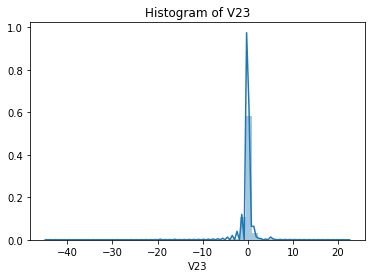

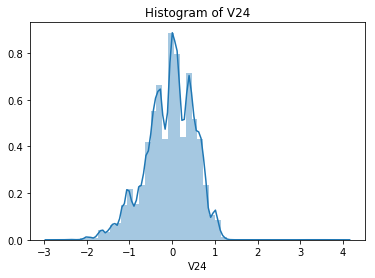

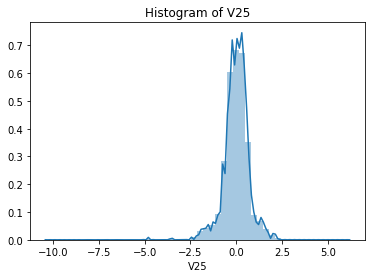

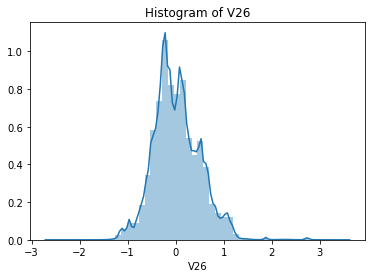

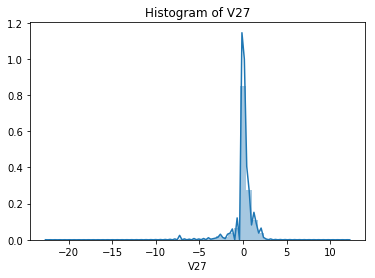

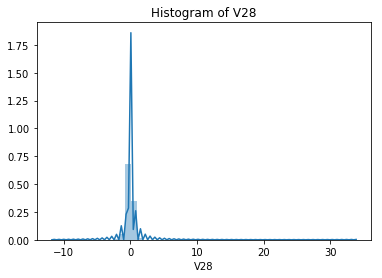

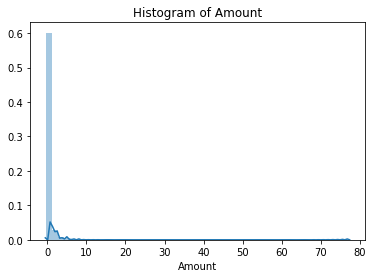

In [36]:
for i in X_train.columns:
    sns.distplot(X_train[i])
    plt.title('Histogram of '+i)
    plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [37]:
from sklearn.preprocessing import PowerTransformer
pt=preprocessing.PowerTransformer(copy=False)
x_train_transform=pt.fit_transform(X_train)

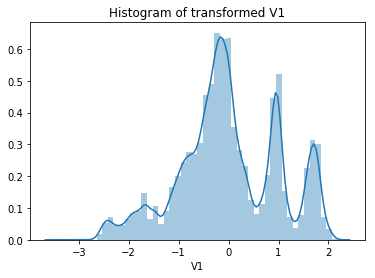

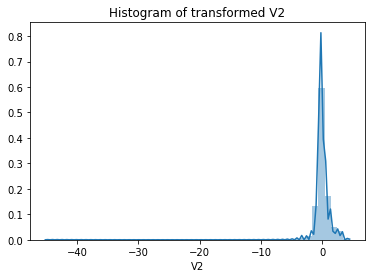

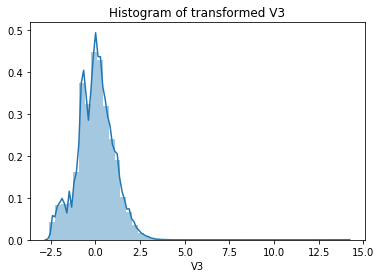

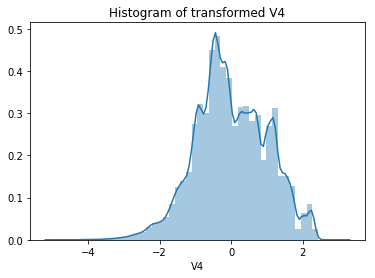

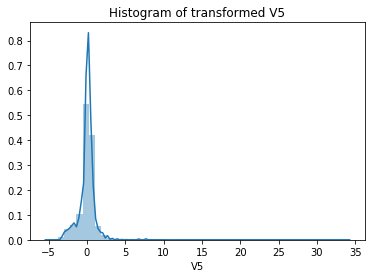

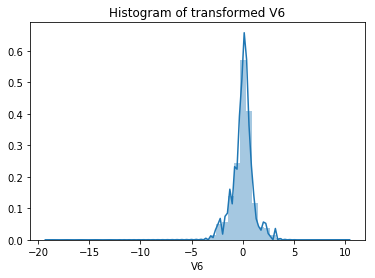

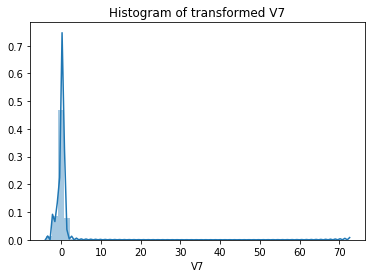

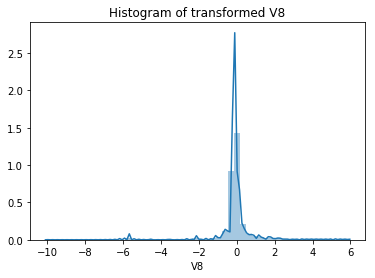

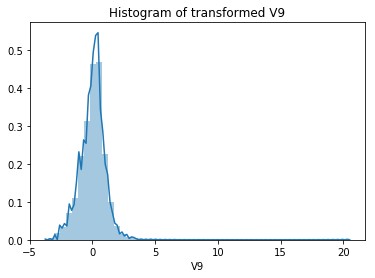

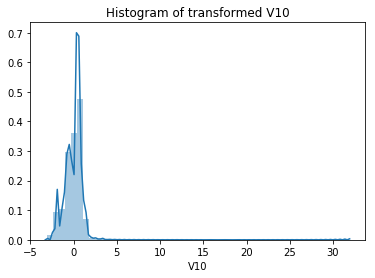

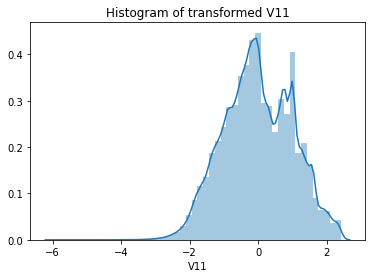

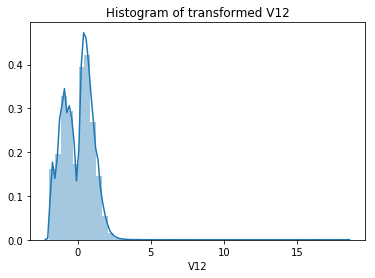

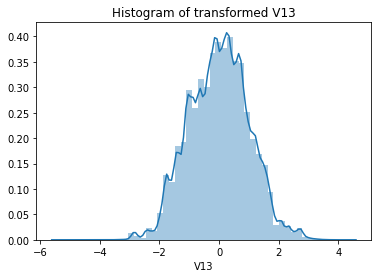

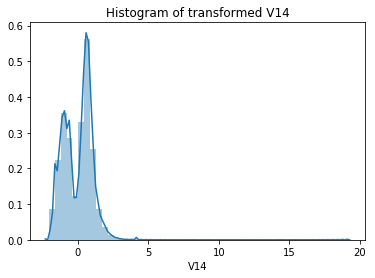

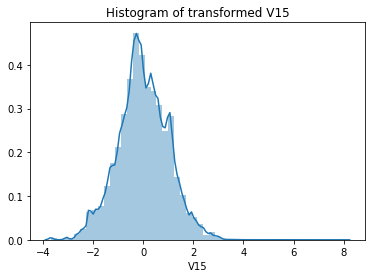

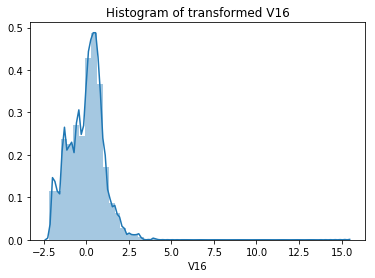

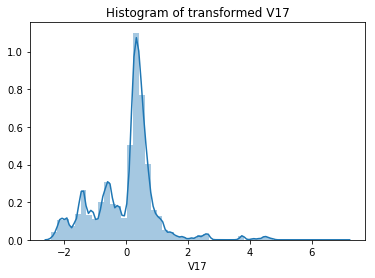

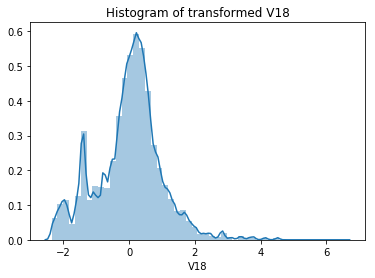

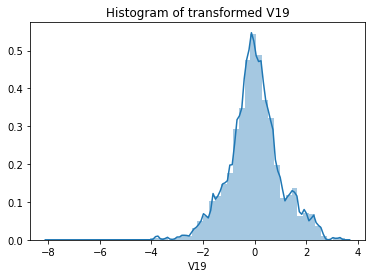

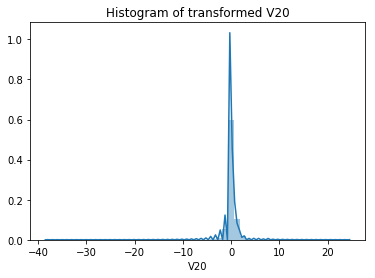

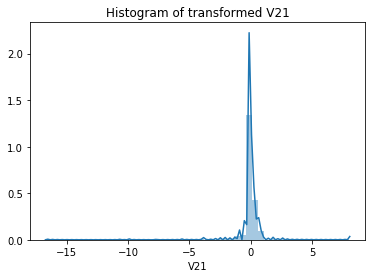

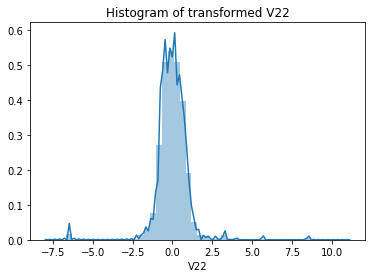

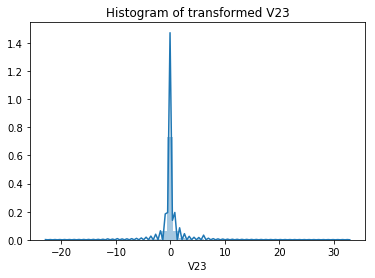

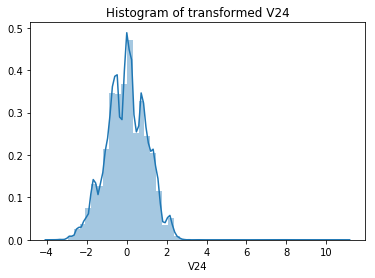

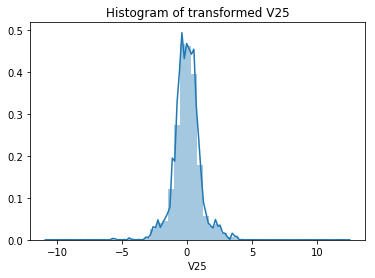

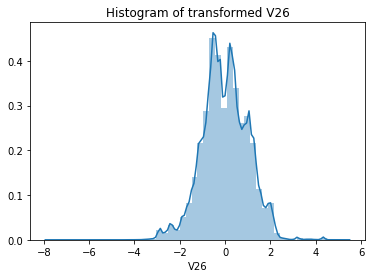

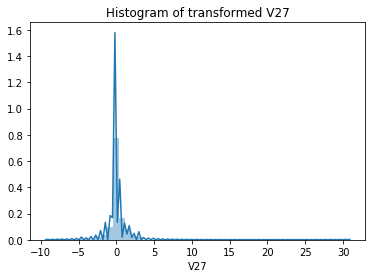

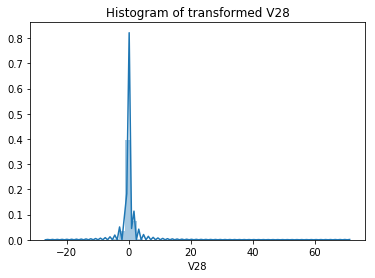

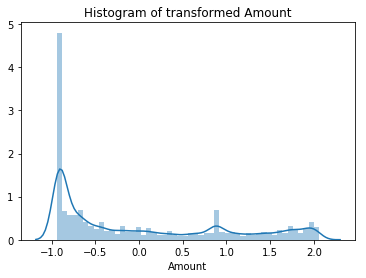

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.104527,-0.063749,0.143848,-0.884295,0.519442,-0.002110,0.652959,-0.068133,0.355365,0.201674,...,-0.191152,-0.212837,-0.786440,0.090082,0.719408,-0.623482,0.290375,-0.126683,-0.051179,-0.696885
1,1.021697,0.337684,-0.708448,0.989550,0.861548,-0.396520,0.124654,-0.116700,-0.740540,-0.331017,...,0.159989,-0.019581,-0.401842,-0.174921,-0.023945,0.926201,0.422139,0.324821,0.537972,-0.896298
2,-0.196025,-0.179784,0.631310,-0.730149,1.094846,0.191691,1.045922,-0.167189,0.174793,0.304778,...,-0.397155,-0.095906,-0.125229,-0.601598,0.275203,2.231426,-1.037643,-0.385041,0.065978,-0.496620
3,-0.878147,1.037427,-0.866389,0.969096,-0.831452,-0.581193,-0.860596,0.722332,-1.590954,-1.148114,...,0.134019,0.330718,-0.743333,0.139262,-0.369698,-0.559343,-0.586640,0.006277,0.782313,0.986178
4,0.032179,-0.111425,1.179324,-0.698234,0.419540,0.451334,0.626948,-0.096023,0.097946,0.416193,...,-0.012120,-0.172746,-0.459657,-0.075646,-0.592125,-0.393700,0.240588,0.065644,0.101765,-0.866377
5,0.895910,-0.879148,0.795769,-0.874491,-0.078709,0.847037,0.096755,-0.101596,0.523948,0.683683,...,0.196379,-0.076922,0.031215,-0.222099,-1.335275,0.551222,-0.355257,-0.180430,0.001666,1.230648
6,-1.399876,-4.093878,-0.439614,-0.087923,-0.644254,2.519249,4.546541,-0.388615,1.238327,0.447866,...,-4.628331,-0.943810,-1.201935,-2.305415,-0.762735,-0.261875,0.675325,0.247019,4.486612,2.044358
7,-0.266225,-0.907745,0.304393,-1.000922,0.503361,-0.177741,0.260478,-0.057078,-0.313838,0.713336,...,-0.127623,0.010525,0.492575,-0.045075,-0.751077,-0.939854,1.371825,-0.177350,-0.303721,0.722589
8,-0.326811,-0.813782,0.486348,-2.956708,0.091110,-0.622561,0.550212,-0.087971,0.235561,0.168369,...,-0.172942,-0.104315,-0.080838,0.223574,1.111598,-0.279817,-1.078808,0.036735,-0.027479,1.283785
9,1.647633,-0.869746,0.258976,-0.832004,-0.131061,0.354950,0.081991,-0.124822,0.608151,0.970016,...,-0.627979,-0.106588,0.303495,0.017630,-0.604298,-0.413297,0.059726,-0.201978,-0.166150,0.635742


In [38]:
x_train_transform=pd.DataFrame(x_train_transform,columns=X_train.columns)
for i in x_train_transform:
     sns.distplot(x_train_transform[i])
     plt.title('Histogram of transformed '+i)
     plt.show()
x_train_transform

In [39]:
# Transforming X_test
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))
x_test_transform=pt.transform(X_test)
x_test_transform=pd.DataFrame(x_test_transform,columns=X_test.columns)

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Decision Tree

In [40]:
# First we will test with Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()  

# Find the best parameters : recall optimisation
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall')

dt_classifier_gs.fit(x_train_transform, Y_train)
best_parameters = dt_classifier_gs.best_estimator_
print('The best parameters are:', best_parameters)

The best parameters are: DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)


### Predictions on Test Data

In [41]:
dt_pred = dt_classifier_gs.predict(x_test_transform)

### Model Evaluation

In [42]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     85172
           1       0.91      0.92      0.92     85417

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589



In [43]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

dt_accuracy = accuracy_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_cm = confusion_matrix(Y_test, dt_pred)
dt_auc = roc_auc_score(Y_test, dt_pred)

print("Accuracy: {:.4%}".format(dt_accuracy))
print("Recall: {:.4%}".format(dt_recall))
print("ROC AUC: {:.4%}".format(dt_auc))

Accuracy: 91.6612%
Recall: 92.1058%
ROC AUC: 91.6606%


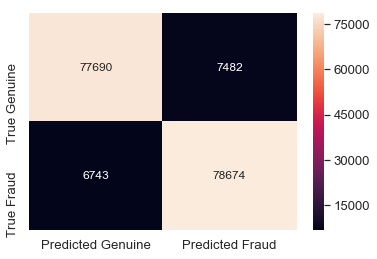

In [44]:
dt_cm = pd.DataFrame(dt_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(dt_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(x_train_transform, Y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [46]:
lr_predict = lr.predict(x_test_transform)

In [47]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

Accuracy: 94.8736%
Recall: 91.9723%
ROC AUC: 94.8778%


In [48]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85172
           1       0.98      0.92      0.95     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



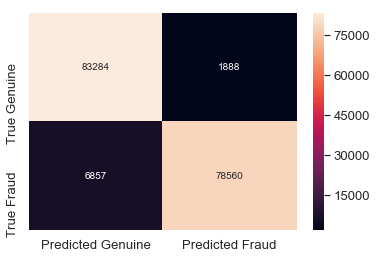

In [49]:
lr_cm = pd.DataFrame(lr_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 10},fmt='g')

## Random Forest with oversampling

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(x_train_transform, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [51]:
rf_predict = rf.predict(x_test_transform)

In [52]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

Accuracy: 99.9959%
Recall: 100.0000%
ROC AUC: 99.9959%


In [53]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



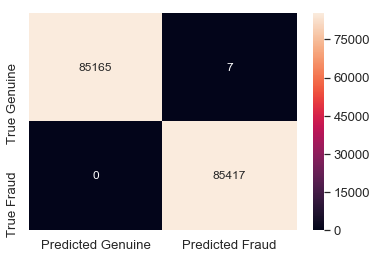

In [54]:
rf_cm = pd.DataFrame(rf_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 12},fmt='g')

## XGBoost with Oversampling

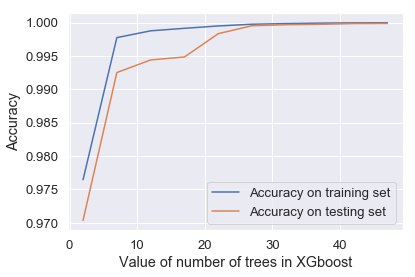

In [55]:
from xgboost import XGBClassifier
tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(x_train_transform,Y_train)
    score1.append(xgb.score(x_train_transform,Y_train))
    score2.append(xgb.score(x_test_transform,Y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
xgb=XGBClassifier(n_estimators=30)
xgb.fit(x_train_transform,Y_train)
print('Accuracy of XGB n=30 on the testing dataset is :{:.3f}'.format(xgb.score(x_test_transform,Y_test)))

Accuracy of XGB n=30 on the testing dataset is :1.000


In [57]:
xgb_predict = xgb.predict(x_test_transform)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [59]:
xgb_accuracy = accuracy_score(Y_test, xgb_predict)
xgb_recall = recall_score(Y_test, xgb_predict)
xgb_cm = confusion_matrix(Y_test, xgb_predict)
xgb_auc = roc_auc_score(Y_test, xgb_predict)

print("Accuracy: {:.4%}".format(xgb_accuracy))
print("Recall: {:.4%}".format(xgb_recall))
print("ROC AUC: {:.4%}".format(xgb_auc))

Accuracy: 99.9584%
Recall: 100.0000%
ROC AUC: 99.9583%


In [60]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



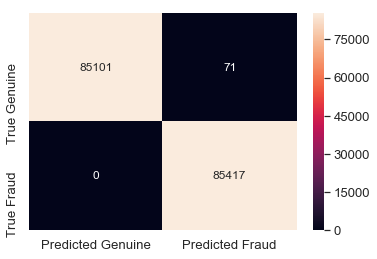

In [61]:
xgb_cm = pd.DataFrame(xgb_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 12},fmt='g')

### K Nearest Neighbours (KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

### Finding Best k in KNN

In [ ]:
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_transform,Y_train)
    score1.append(knn.score(x_train_transform,Y_train))
    score2.append(knn.score(x_test_transform,Y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

#### Best k value from the above Graph is 3

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_transform,Y_train)
print('Accuracy of KNN n=6 on the testing dataset is :{:.3f}'.format(knn.score(x_test_transform,Y_test)))

#### Prediction on Test Data

In [ ]:
knn_predict = knn.predict(x_test_transform)

In [ ]:
knn_accuracy = accuracy_score(Y_test, knn_predict)
knn_recall = recall_score(Y_test, knn_predict)
knn_cm = confusion_matrix(Y_test, knn_predict)
knn_auc = roc_auc_score(Y_test, knn_predict)

print("Accuracy: {:.4%}".format(knn_accuracy))
print("Recall: {:.4%}".format(knn_recall))
print("ROC AUC: {:.4%}".format(knn_auc))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, knn_predict))

In [ ]:
knn_cm = pd.DataFrame(knn_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(knn_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Data Balancing with SMOTE

In [64]:
y=df.Class
X=df.drop('Class',axis=1)

In [65]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

oversampler = SMOTE(random_state = 0, n_jobs = -1)
#sampler = SMOTETomek(random_state = 0)
smote_train_lr , smote_test_lr = oversampler.fit_sample(X, y)

### Data Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(smote_train_lr, smote_test_lr, 
                                                    test_size = 0.30, random_state = 0)

### Data Standardisation 

In [67]:
scale = preprocessing.StandardScaler()
X_train['Amount']=scale.fit_transform(pd.DataFrame(X_train['Amount'],columns=['Amount']))

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Data Skewness fixing using Power Transformer

In [69]:
from sklearn.preprocessing import PowerTransformer
pt=preprocessing.PowerTransformer(copy=False)
x_train_transform1=pt.fit_transform(X_train)

In [70]:
x_train_transform1=pd.DataFrame(x_train_transform1,columns=X_train.columns)

In [71]:
# Transforming X_test
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))
x_test_transform1=pt.transform(X_test)
x_test_transform1=pd.DataFrame(x_test_transform1,columns=X_test.columns)

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Model building with SMOTE balanced data

### Decision Tree

In [72]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()  

# Find the best parameters : recall optimisation
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall')

dt_classifier_gs.fit(x_train_transform1, y_train)
best_parameters = dt_classifier_gs.best_estimator_
print('The best parameters are:', best_parameters)

The best parameters are: DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


In [73]:
dt_pred_smt = dt_classifier_gs.predict(x_test_transform1)

In [74]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_pred_smt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     85172
           1       0.96      0.93      0.94     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



In [75]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

dtsmt_accuracy = accuracy_score(y_test, dt_pred_smt)
dtsmt_recall = recall_score(y_test, dt_pred_smt)
dtsmt_cm = confusion_matrix(y_test, dt_pred_smt)
dtsmt_auc = roc_auc_score(y_test, dt_pred_smt)

print("Accuracy: {:.4%}".format(dtsmt_accuracy))
print("Recall: {:.4%}".format(dtsmt_recall))
print("ROC AUC: {:.4%}".format(dtsmt_auc))

Accuracy: 94.5835%
Recall: 92.8281%
ROC AUC: 94.5860%


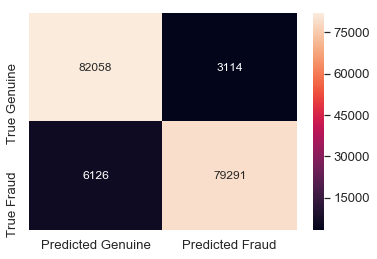

In [76]:
dtsmt_cm = pd.DataFrame(dtsmt_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(dtsmt_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Regression Model with SMOTE

In [77]:
from sklearn.linear_model import LogisticRegression

lrs = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lrs.fit(x_train_transform1, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [78]:
lrs_predict = lrs.predict(x_test_transform1)

In [79]:
# Evaluating the Regression model
from sklearn.metrics import classification_report

print(classification_report(y_test, lrs_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     85172
           1       0.97      0.96      0.96     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [80]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lrs_accuracy = accuracy_score(y_test, lrs_predict)
lrs_recall = recall_score(y_test, lrs_predict)
lrs_cm = confusion_matrix(y_test, lrs_predict)
lrs_auc = roc_auc_score(y_test, lrs_predict)

print("Accuracy: {:.4%}".format(lrs_accuracy))
print("Recall: {:.4%}".format(lrs_recall))
print("ROC AUC: {:.4%}".format(lrs_auc))

Accuracy: 96.3989%
Recall: 95.5056%
ROC AUC: 96.4002%


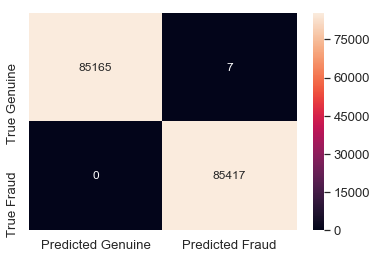

In [81]:
lrs_cm = pd.DataFrame(lrs_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Random Forest with SMOTE

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rfs.fit(x_train_transform1, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [83]:
rfs_predict = rfs.predict(x_test_transform1)

In [84]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, rfs_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     85172
           1       1.00      0.99      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [85]:
rfs_accuracy = accuracy_score(y_test, rfs_predict)
rfs_recall = recall_score(y_test, rfs_predict)
rfs_cm = confusion_matrix(y_test, rfs_predict)
rfs_auc = roc_auc_score(y_test, rfs_predict)

print("Accuracy: {:.4%}".format(rfs_accuracy))
print("Recall: {:.4%}".format(rfs_recall))
print("ROC AUC: {:.4%}".format(rfs_auc))

Accuracy: 99.3780%
Recall: 98.7836%
ROC AUC: 99.3789%


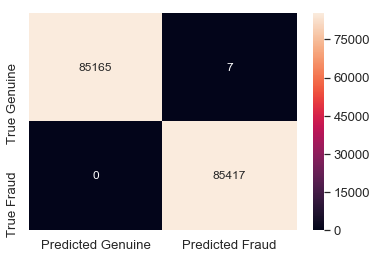

In [86]:
rfs_cm = pd.DataFrame(rfs_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 12},fmt='g')

## XGBoost with SMOTE

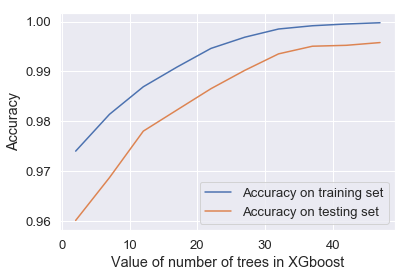

In [87]:
from xgboost import XGBClassifier
tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgbs=XGBClassifier(n_estimators=tree)
    xgbs.fit(x_train_transform1,y_train)
    score1.append(xgbs.score(x_train_transform1,y_train))
    score2.append(xgbs.score(x_test_transform1,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [88]:
xgbs=XGBClassifier(n_estimators=12)
xgbs.fit(x_train_transform1,y_train)
print('Accuracy of XGB n=12 on the testing dataset is :{:.3f}'.format(xgbs.score(x_test_transform1,y_test)))

Accuracy of XGB n=12 on the testing dataset is :0.978


In [89]:
xgbs_predict = xgbs.predict(x_test_transform1)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgbs_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     85172
           1       0.98      0.98      0.98     85417

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [91]:
xgbs_accuracy = accuracy_score(y_test, xgbs_predict)
xgbs_recall = recall_score(y_test, xgbs_predict)
xgbs_cm = confusion_matrix(y_test, xgbs_predict)
xgbs_auc = roc_auc_score(y_test, xgbs_predict)

print("Accuracy: {:.4%}".format(xgbs_accuracy))
print("Recall: {:.4%}".format(xgbs_recall))
print("ROC AUC: {:.4%}".format(xgbs_auc))

Accuracy: 97.8053%
Recall: 97.6211%
ROC AUC: 97.8055%


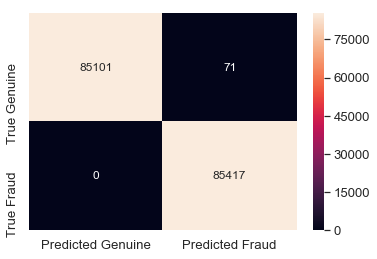

In [92]:
xgbs_cm = pd.DataFrame(xgbs_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 12},fmt='g')

## KNN with SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Finding Best k in KNN¶

In [ ]:
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    knns=KNeighborsClassifier(n_neighbors=k)
    knns.fit(x_train_transform1,y_train)
    score1.append(knns.score(x_train_transform1,y_train))
    score2.append(knns.score(x_test_transform1,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knns=KNeighborsClassifier(n_neighbors=3)
knns.fit(x_train_transform1,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.3f}'.format(knns.score(x_test_transform1,y_test)))

#### Prediction on Test Data

In [ ]:
knns_predict = knns.predict(x_test_transform1)

### Evaluation of the model

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knns_predict))

In [ ]:
knns_accuracy = accuracy_score(y_test, knns_predict)
knns_recall = recall_score(y_test, knns_predict)
knns_cm = confusion_matrix(y_test, knns_predict)
knns_auc = roc_auc_score(y_test, knns_predict)

print("Accuracy: {:.4%}".format(knns_accuracy))
print("Recall: {:.4%}".format(knns_recall))
print("ROC AUC: {:.4%}".format(knns_auc))

In [ ]:
knns_cm = pd.DataFrame(knns_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(knn_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Data Balancing with ADASYN

In [94]:
y=df.Class
X=df.drop('Class',axis=1)

In [95]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
adasyn_train_lr , adasyn_test_lr = ada.fit_resample(X, y)

### Data Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adasyn_train_lr, adasyn_test_lr, 
                                                    test_size = 0.30, random_state = 0)

### Data Standardisation

In [97]:
scale = preprocessing.StandardScaler()
X_train['Amount']=scale.fit_transform(pd.DataFrame(X_train['Amount'],columns=['Amount']))

In [98]:
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))

### Data Skewness 

In [99]:
from sklearn.preprocessing import PowerTransformer
pt=preprocessing.PowerTransformer(copy=False)
x_train_transform2=pt.fit_transform(X_train)
x_train_transform2=pd.DataFrame(x_train_transform2,columns=X_train.columns)

In [100]:
# Transforming X_test
X_test['Amount']=scale.transform(pd.DataFrame(X_test['Amount'],columns=['Amount']))
x_test_transform2=pt.transform(X_test)
x_test_transform2=pd.DataFrame(x_test_transform2,columns=X_test.columns)

x_train_transform2, x_test_transform2, y-train, y-test

## Decision Tree with ADASYN

In [101]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()  

# Find the best parameters : recall optimisation
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall')

dt_classifier_gs.fit(x_train_transform2, y_train)
best_parameters = dt_classifier_gs.best_estimator_
print('The best parameters are:', best_parameters)

The best parameters are: DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


### Predition for Test Data & Model Evaluation

In [102]:
dt_pred_ada = dt_classifier_gs.predict(x_test_transform2)

In [103]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     85309
           1       0.78      0.94      0.85     85258

    accuracy                           0.84    170567
   macro avg       0.85      0.84      0.84    170567
weighted avg       0.85      0.84      0.84    170567



In [104]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

dtada_accuracy = accuracy_score(y_test, dt_pred_ada)
dtada_recall = recall_score(y_test, dt_pred_ada)
dtada_cm = confusion_matrix(y_test, dt_pred_ada)
dtada_auc = roc_auc_score(y_test, dt_pred_ada)

print("Accuracy: {:.4%}".format(dtada_accuracy))
print("Recall: {:.4%}".format(dtada_recall))
print("ROC AUC: {:.4%}".format(dtada_auc))

Accuracy: 83.7894%
Recall: 94.0932%
ROC AUC: 83.7924%


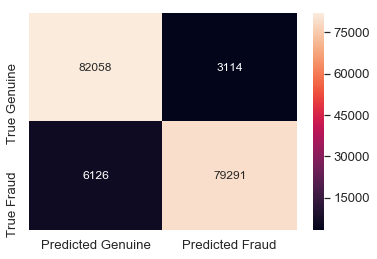

In [105]:
dtada_cm = pd.DataFrame(dtada_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(dtsmt_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Regression Model with ADASYN

In [106]:
from sklearn.linear_model import LogisticRegression

lra = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lra.fit(x_train_transform2, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [107]:
lra_predict = lra.predict(x_test_transform2)

In [108]:
# Evaluating the Regression model
from sklearn.metrics import classification_report

print(classification_report(y_test, lra_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     85309
           1       0.93      0.93      0.93     85258

    accuracy                           0.93    170567
   macro avg       0.93      0.93      0.93    170567
weighted avg       0.93      0.93      0.93    170567



In [109]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lra_accuracy = accuracy_score(y_test, lra_predict)
lra_recall = recall_score(y_test, lra_predict)
lra_cm = confusion_matrix(y_test, lra_predict)
lra_auc = roc_auc_score(y_test, lra_predict)

print("Accuracy: {:.4%}".format(lra_accuracy))
print("Recall: {:.4%}".format(lra_recall))
print("ROC AUC: {:.4%}".format(lra_auc))

Accuracy: 93.1095%
Recall: 92.7796%
ROC AUC: 93.1094%


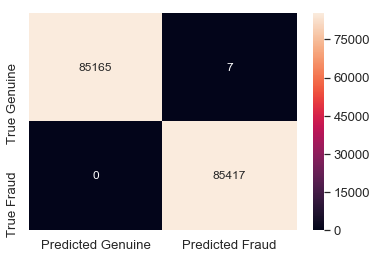

In [110]:
lra_cm = pd.DataFrame(lra_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 12},fmt='g')

## Random Forest with ADASYN

In [111]:
from sklearn.ensemble import RandomForestClassifier

rfada = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rfada.fit(x_train_transform2, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [112]:
rfada_predict = rfada.predict(x_test_transform2)

In [113]:
# Evaluating the Random Forest Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, rfada_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     85309
           1       1.00      0.96      0.98     85258

    accuracy                           0.98    170567
   macro avg       0.98      0.98      0.98    170567
weighted avg       0.98      0.98      0.98    170567



In [114]:
rfada_accuracy = accuracy_score(y_test, rfada_predict)
rfada_recall = recall_score(y_test, rfada_predict)
rfada_cm = confusion_matrix(y_test, rfada_predict)
rfada_auc = roc_auc_score(y_test, rfada_predict)

print("Accuracy: {:.4%}".format(rfada_accuracy))
print("Recall: {:.4%}".format(rfada_recall))
print("ROC AUC: {:.4%}".format(rfada_auc))

Accuracy: 98.1221%
Recall: 96.2701%
ROC AUC: 98.1216%


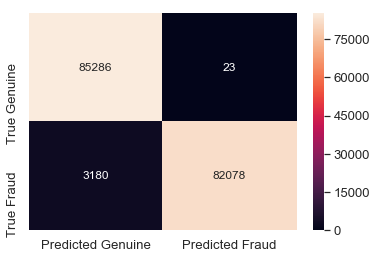

In [115]:
rfada_cm = pd.DataFrame(rfada_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(rfada_cm, annot=True,annot_kws={"size": 12},fmt='g')

## XGBoost with ADASYN

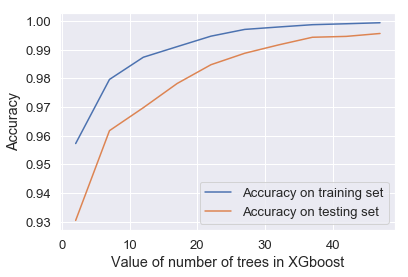

In [116]:
from xgboost import XGBClassifier
tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgba=XGBClassifier(n_estimators=tree)
    xgba.fit(x_train_transform2,y_train)
    score1.append(xgba.score(x_train_transform2,y_train))
    score2.append(xgba.score(x_test_transform2,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [117]:
xgba=XGBClassifier(n_estimators=36)
xgba.fit(x_train_transform2,y_train)
print('Accuracy of XGB n= on the testing dataset is :{:.3f}'.format(xgba.score(x_test_transform2,y_test)))

Accuracy of XGB n= on the testing dataset is :0.994


### Model Prediction & Evaluation

In [118]:
xgba_predict = xgba.predict(x_test_transform2)

In [119]:
# Evaluating the XGBoost
from sklearn.metrics import classification_report

print(classification_report(y_test, xgba_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85309
           1       0.99      1.00      0.99     85258

    accuracy                           0.99    170567
   macro avg       0.99      0.99      0.99    170567
weighted avg       0.99      0.99      0.99    170567



In [120]:
xgba_accuracy = accuracy_score(y_test, xgba_predict)
xgba_recall = recall_score(y_test, xgba_predict)
xgba_cm = confusion_matrix(y_test, xgba_predict)
xgba_auc = roc_auc_score(y_test, xgba_predict)

print("Accuracy: {:.4%}".format(xgba_accuracy))
print("Recall: {:.4%}".format(xgba_recall))
print("ROC AUC: {:.4%}".format(xgba_auc))

Accuracy: 99.3996%
Recall: 99.5003%
ROC AUC: 99.3997%


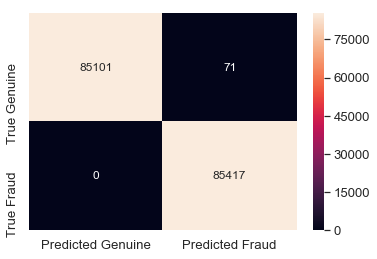

In [121]:
xgba_cm = pd.DataFrame(xgba_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 12},fmt='g')

## KNN with ADASYN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    knna=KNeighborsClassifier(n_neighbors=k)
    knna.fit(x_train_transform2,y_train)
    score1.append(knna.score(x_train_transform2,y_train))
    score2.append(knna.score(x_test_transform2,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knna=KNeighborsClassifier(n_neighbors=3)
knna.fit(x_train_transform2,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.3f}'.format(knna.score(x_test_transform2,y_test)))

In [ ]:
knna_predict = knna.predict(x_test_transform2)

In [ ]:
# Evaluating the KNN
from sklearn.metrics import classification_report

print(classification_report(y_test, knna_predict))

In [ ]:
knna_accuracy = accuracy_score(y_test, knna_predict)
knna_recall = recall_score(y_test, knna_predict)
knna_cm = confusion_matrix(y_test, knna_predict)
knna_auc = roc_auc_score(y_test, knna_predict)

print("Accuracy: {:.4%}".format(knna_accuracy))
print("Recall: {:.4%}".format(knna_recall))
print("ROC AUC: {:.4%}".format(knna_auc))

In [ ]:
knna_cm = pd.DataFrame(knna_cm, ['True Genuine','True Fraud'],['Predicted Genuine','Predicted Fraud'])
pyplot.figure(figsize = (6,4))
sns.set(font_scale=1.2)
sns.heatmap(knn_cm, annot=True,annot_kws={"size": 12},fmt='g')

### Conclusion

- Random Forest gives best scores when we follow the over sampling method for data balancing
- XG Boost gives best scores when we balance the data using ADASYN technique and second best scores when we follow the over sampling method for data balancing
- KNN gives best scores when we balance the data using SMOTE technique and second best scores when we follow the ADASYN method for data balancing.
- Low_Performance Model: Decision Tree is low performer among all the models
					
					
					
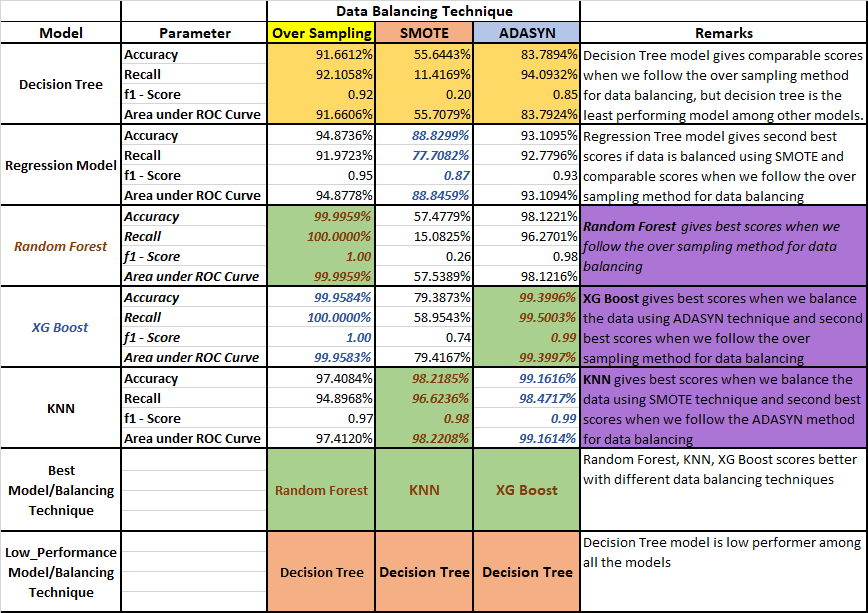